In [24]:
%run 'librairies.ipynb'

In [14]:
import requests

In [27]:
params = {
    'site': 1,
    'period': 'day',
    'date': '2014-01-01,2018-12-31',
}

def get_stats():
    stats_url = 'https://stats.data.gouv.fr/?idSite=%(site)s&module=API&method=API.get&format=json&period=%(period)s&date=%(date)s' % params
    
    # print(stats_url)
    
    r = requests.get(stats_url)
    return r.json()

In [28]:
years = range(2014, 2018)

In [29]:
df = pd.DataFrame(get_stats()).transpose()

In [30]:
df.reset_index(inplace=True)
df.head()

,index,avg_time_generation,avg_time_on_site,avg_time_on_site_returning,bounce_count,bounce_rate,bounce_rate_returning,conversion_rate,conversion_rate_new_visit,conversion_rate_returning_visit,...,nb_users_returning,nb_visits,nb_visits_converted,nb_visits_converted_new_visit,nb_visits_converted_returning_visit,nb_visits_returning,revenue,revenue_new_visit,revenue_returning_visit,sum_visit_length
0,2014-01-01,0.243,202,170,385,46%,61%,0%,0%,0%,...,0,835,0,0,0,220,0,0,0,168799
1,2014-01-02,0.275,256,316,799,40%,46%,0%,0%,0%,...,0,2013,0,0,0,495,0,0,0,515282
2,2014-01-03,0.258,249,396,686,40%,43%,0%,0%,0%,...,0,1701,0,0,0,387,0,0,0,422992
3,2014-01-04,0.333,278,332,420,46%,52%,0%,0%,0%,...,0,909,0,0,0,225,0,0,0,253053
4,2014-01-05,0.353,192,228,479,48%,53%,0%,0%,0%,...,0,1000,0,0,0,210,0,0,0,191646


In [40]:
df.count()

index                                  1826
avg_time_generation                    1826
avg_time_on_site                       1826
avg_time_on_site_returning             1826
bounce_count                           1826
bounce_rate                            1826
bounce_rate_returning                  1826
conversion_rate                        1826
conversion_rate_new_visit              1718
conversion_rate_returning_visit        1826
max_actions                            1826
max_actions_returning                  1826
nb_actions                             1826
nb_actions_per_visit                   1826
nb_actions_per_visit_returning         1826
nb_actions_returning                   1826
nb_conversions                         1826
nb_conversions_new_visit               1718
nb_conversions_returning_visit         1826
nb_downloads                           1826
nb_hits_with_time_generation           1826
nb_keywords                            1826
nb_outlinks                     

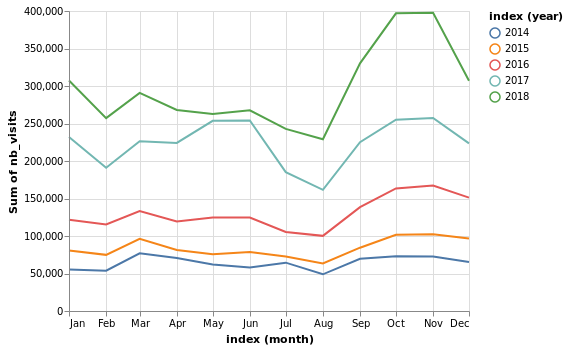

In [44]:
alt.Chart(df).mark_line().encode(
    x="month(index):T",
    y="sum(nb_visits):Q",
    color="year(index):N"
)

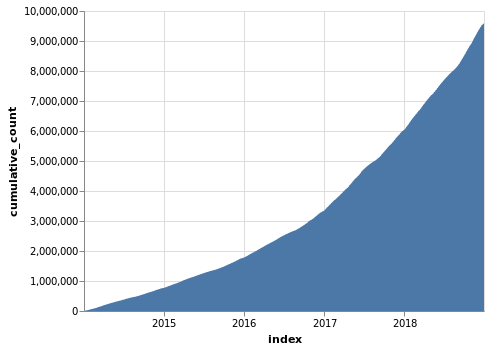

In [42]:
alt.Chart(df).mark_area().encode(
    x="index:T",
    y="cumulative_count:Q",
).transform_window(
    window=[{ "op": "sum", "field": "nb_visits", "as": "cumulative_count"}],
    sort=[{'field': "index"}]
)

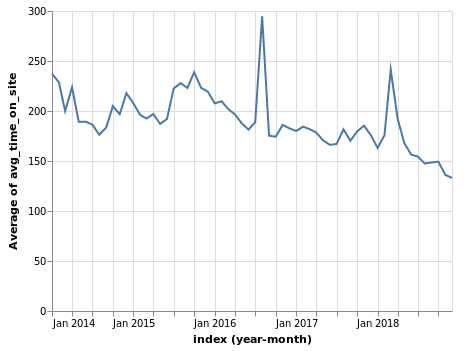

In [50]:
alt.Chart(df).mark_line().encode(
    x="yearmonth(index):T",
    y="average(avg_time_on_site):Q",
)

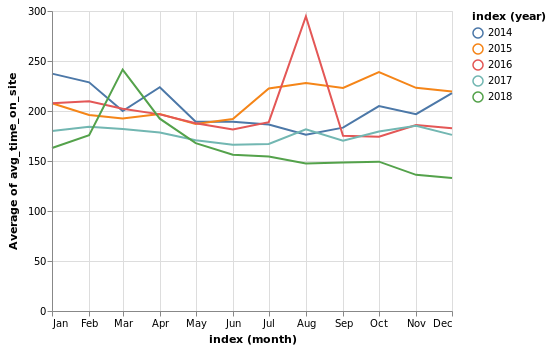

In [51]:
alt.Chart(df).mark_line().encode(
    x="month(index):T",
    y="average(avg_time_on_site):Q",
    color="year(index):N"
)

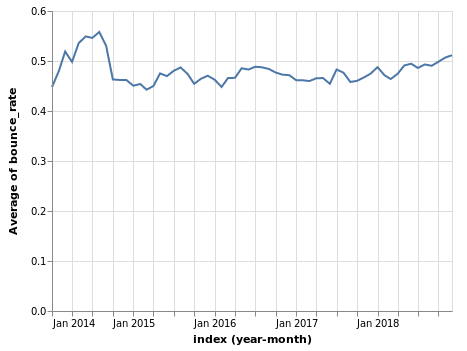

In [63]:
alt.Chart(df).mark_line().encode(
    x="yearmonth(index):T",
    y="average(bounce_rate):Q",
).transform_calculate(
    bounce_rate = alt.datum.bounce_count / alt.datum.nb_visits
)

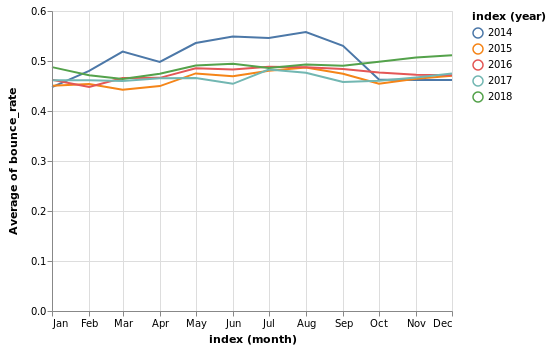

In [64]:
alt.Chart(df).mark_line().encode(
    x="month(index):T",
    y="average(bounce_rate):Q",
    color="year(index):N"
).transform_calculate(
    bounce_rate = alt.datum.bounce_count / alt.datum.nb_visits
)